<a href="https://colab.research.google.com/github/yfhkucing/experiment_bms/blob/master/Heatmap_with_model_154.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import joblib
import numpy as np
import pandas as pd

In [3]:
! unzip /content/models_temp_154_a06.zip

Archive:  /content/models_temp_154_a06.zip
replace content/models/model 125? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: content/models/model 125  
  inflating: content/models/model 111  
  inflating: content/models/model 58  
  inflating: content/models/model 68  
  inflating: content/models/model 105  
  inflating: content/models/model 108  
  inflating: content/models/model 17  
  inflating: content/models/model 106  
  inflating: content/models/model 87  
  inflating: content/models/model 63  
  inflating: content/models/model 26  
  inflating: content/models/model 150  
  inflating: content/models/model 23  
  inflating: content/models/model 52  
  inflating: content/models/model 124  
  inflating: content/models/model 41  
  inflating: content/models/model 54  
  inflating: content/models/model 7  
  inflating: content/models/model 147  
  inflating: content/models/model 48  
  inflating: content/models/model 112  
  inflating: content/models/model 73  
  inflating: cont

In [4]:
feature = pd.read_excel('data_model.xlsx',sheet_name='feature')
label = pd.read_excel('data_model.xlsx',sheet_name='label_154')

In [5]:
feature.head()

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan/i1,Fan/i2,Fan/i3,Fan/i4,Fan/i5,Fan/i6,Fan/o1,Fan/o2,Fan/o3,Fan/o4,Fan/o5,Fan/o6
0,0,0,171,0.5,27.0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,153,0.4,31.5,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,47,4.8,33.1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,62,4.1,27.4,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,341,3.8,30.6,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
array_y = []

for i in range(154):
  frame= label[i::154]
  frame = frame.drop(['koor_x','koor_y',],axis=1)
  frame = frame.drop(['Vx','Vy'],axis=1)
  array_y.append(frame)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

skor_r2=[]
mae_=[]
rmse = []
y_predict = []
y_test = []
for i in range(154):
  x = np.array(feature)
  y = np.array(array_y[i])
  model = joblib.load(f'/content/content/models/model {i}')
  y_pred = model.predict(x)
  Skor_r2 = r2(y,y_pred)
  RMSE = mse(y,y_pred,squared=False)
  MAE = mae(y,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [8]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y = np.array(array_y)

In [9]:
#error per skenario

r_squared = []
abs_error = []
sqrt_error = []
for i in range(192):
  a = y[...,i,0]
  b = y_predict[...,i]
  r_squared.append(r2(a,b))
  abs_error.append(mae(a,b))
  sqrt_error.append(mse(a,b))

In [10]:
error = pd.DataFrame(r_squared,columns=['r2'])
abs_error = pd.DataFrame(abs_error,columns=['mae'])
sqrt_error = pd.DataFrame(sqrt_error,columns=['rmse'])
error = error.join(abs_error)
error = error.join(sqrt_error)

In [11]:
error.describe()

,r2,mae,rmse
count,192.000000,192.000000,192.000000
mean,-2.842075,1.930225,5.541329
std,12.181586,1.053540,5.366011
min,-102.204433,0.239126,0.094274
25%,-1.106657,1.176066,1.704694
50%,-0.161849,1.739958,3.477795
75%,0.519119,2.649745,7.878021
max,0.956340,5.005900,27.185816


In [12]:
error[error.r2 == error.r2.max()]

,r2,mae,rmse
14,0.95634,0.354027,0.261161


In [13]:
error[error.r2 == error.r2.min()]

,r2,mae,rmse
59,-102.204433,4.292269,20.537848


In [14]:
r2_matrix = skor_r2.reshape(11,14)
rmse_matrix = rmse.reshape(11,14)
mae_matrix = mae_.reshape(11,14)

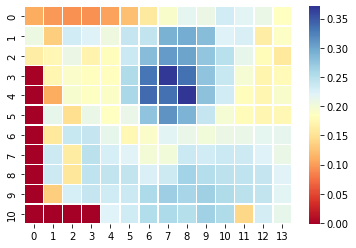

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

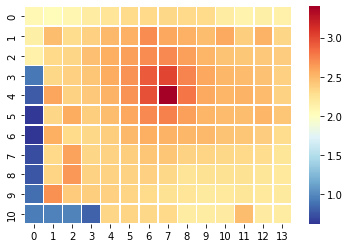

In [16]:
bx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

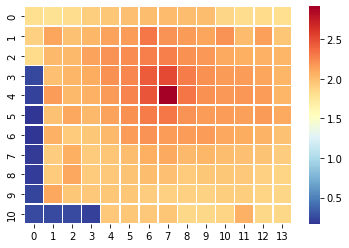

In [17]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [18]:
! mkdir subplot

mkdir: cannot create directory ‘subplot’: File exists


In [19]:
df_koor = pd.read_excel('data_model.xlsx',sheet_name='koordinat_154')

In [20]:
df_koor.head()

,koor_x,koor_y
0,1,6
1,1,16
2,1,30
3,1,45
4,1,63


In [21]:
def suhu(y):
  df_y = pd.DataFrame(y)
  df_z = pd.DataFrame(y)
  df_z.rename(columns={0:1},inplace=True)
  df_y = df_y.join(df_z)
  df_y = df_y.join(df_koor)
  df_y.rename(columns={0:'Vx',1:'suhu'},inplace=True)
  df_y.pop('Vx')
  return df_y

In [22]:
from plotly.subplots import make_subplots
for i in range(192):
  a = y[(...,i,0)]
  b = y_predict[(...,i)]
  a = np.array(a)
  b = np.array(b)
  a = suhu(a)
  b = suhu(b)
  
  fig = make_subplots(rows=1, cols=2)

  fig.add_contour(
     z = a['suhu'].tolist(),
     x = a['koor_x'].tolist(),
     y = a['koor_y'].tolist(),
     row=1, col=1
  )

  fig.add_contour(
     z = b['suhu'].tolist(),
     x = b['koor_x'].tolist(),
     y = b['koor_y'].tolist(),
     row=1, col=2
  )
  fig.write_image(f'/content/subplot/fig {i}.png')

In [23]:
!zip -r /content/subplot.zip /content/subplot

  adding: content/subplot/ (stored 0%)
  adding: content/subplot/fig 48.png (deflated 4%)
  adding: content/subplot/fig 157.png (deflated 5%)
  adding: content/subplot/fig 60.png (deflated 4%)
  adding: content/subplot/fig 61.png (deflated 5%)
  adding: content/subplot/fig 3.png (deflated 4%)
  adding: content/subplot/fig 23.png (deflated 3%)
  adding: content/subplot/fig 73.png (deflated 5%)
  adding: content/subplot/fig 138.png (deflated 5%)
  adding: content/subplot/fig 94.png (deflated 3%)
  adding: content/subplot/fig 42.png (deflated 4%)
  adding: content/subplot/fig 112.png (deflated 5%)
  adding: content/subplot/fig 0.png (deflated 4%)
  adding: content/subplot/fig 131.png (deflated 5%)
  adding: content/subplot/fig 180.png (deflated 5%)
  adding: content/subplot/fig 188.png (deflated 4%)
  adding: content/subplot/fig 110.png (deflated 5%)
  adding: content/subplot/fig 169.png (deflated 6%)
  adding: content/subplot/fig 128.png (deflated 5%)
  adding: content/subplot/fig 190.pn